In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install PYPDF2

     |████████████████████████████████| 81kB 7.0MB/s 
  Created wheel for PYPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61102 sha256=7d199862af8e853423f03c67078c7c80dd4dbed0452dff867d0484bf2b1e3a4f
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PYPDF2


# Projeto 1

## Parte A
Ler os 20 arquivos fornecidos, cada um a ser tratado como o vetor de atributo de um respectivo objeto, e realizar visualizações como sequência de valores e como histogramas. Obter também algumas estatísticas dos valores em cada arquivo. A partir das informações assim obtidas, tentar identificar grupos entre os arquivos e propor um possível respectivo modelo capaz de gerar novos padrões com características semelhantes aos originais. Comparar visualizações, estatísticas dos sinais originais e os obtidos pelo modelo proposto, verificando se são semelhantes ou não. Visualizar os dois tipos de sinais modelados também como imagens em níveis de cinza de 200 X 200 pixels.

### Dados Fornecidos


In [2]:
# Read files from github
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/xmrcl0/7600064/main/project1/data/"

files=['dados_01', 'dados_02', 'dados_03', 'dados_04', 'dados_05',\
       'dados_06', 'dados_07', 'dados_08', 'dados_09', 'dados_10',\
       'dados_11', 'dados_12', 'dados_13', 'dados_14', 'dados_15',\
       'dados_16', 'dados_17', 'dados_18', 'dados_19', 'dados_20']

frame = [ pd.read_csv(url + f, delimiter=" ") for f in files ]
#frame

Para facilitar a criação dos gráficos, criaremos um dataframe, onde cada coluna corresponde aos dados de um arquivo.

In [3]:
# Create a dataframe with frame to ease the manipulation
df = pd.concat(frame, axis=1)
#df.head()

In [4]:
# Rename the columns with files names
df.columns = files
df.head()

,dados_01,dados_02,dados_03,dados_04,dados_05,dados_06,dados_07,dados_08,dados_09,dados_10,dados_11,dados_12,dados_13,dados_14,dados_15,dados_16,dados_17,dados_18,dados_19,dados_20
1,-0.299786,0.009716,0.431900,0.304824,0.182374,0.441248,0.060216,0.360217,-0.310677,-0.049721,-0.964961,-0.901943,1.430848,0.061332,0.250371,-0.420767,-0.700540,1.320953,0.431348,0.242801
2,0.185219,0.466368,0.356442,0.373700,0.015946,0.412779,0.296817,0.140874,0.395670,-0.143049,-0.534426,0.302538,0.751639,0.956654,-0.871101,0.049740,-0.988480,-1.716301,-0.852101,-1.683024
3,0.416876,-0.325726,0.067605,0.373948,0.156040,0.449142,0.185673,-0.431644,0.281801,-0.165599,0.513940,0.760448,-0.074032,-0.788282,0.766369,0.100789,0.646918,2.062422,-0.749985,-0.965701
4,-0.215601,-0.339052,0.087522,-0.248585,0.398459,0.225595,-0.092601,-0.458185,0.255904,-0.275065,-0.036265,-0.493600,1.441648,0.375488,0.077286,0.656457,-0.094634,0.540196,-0.413256,1.634112
5,-0.395350,0.003940,0.492537,-0.145185,-0.292421,-0.073513,-0.015023,-0.039520,0.278937,0.400528,-1.483185,-1.295692,-1.280120,1.288628,-0.769761,-0.281038,-1.844840,-0.329664,-0.862924,0.768298


In [5]:
# Show some statistics for the dataframe
df.describe()

,dados_01,dados_02,dados_03,dados_04,dados_05,dados_06,dados_07,dados_08,dados_09,dados_10,dados_11,dados_12,dados_13,dados_14,dados_15,dados_16,dados_17,dados_18,dados_19,dados_20
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.003232,-0.003458,0.014871,-0.021507,-0.005901,0.008580,0.001191,-0.001377,0.020742,0.001219,-0.071818,-0.036625,0.055967,0.042742,-0.046774,0.013081,-0.067730,0.058912,-0.125249,-0.014661
std,0.295128,0.289296,0.297516,0.280521,0.280787,0.284212,0.286473,0.296507,0.299617,0.283300,0.992690,1.004047,0.974367,1.101496,0.994017,0.999989,0.988127,1.004140,0.980748,1.049023
min,-0.499766,-0.495404,-0.495708,-0.494718,-0.499125,-0.494152,-0.499257,-0.498100,-0.499513,-0.499208,-3.320545,-4.149454,-2.903550,-3.437106,-3.240244,-3.178576,-2.888680,-2.525039,-2.825354,-3.483882
25%,-0.252903,-0.256565,-0.259124,-0.249021,-0.246871,-0.226192,-0.242648,-0.252961,-0.249894,-0.231654,-0.784293,-0.712106,-0.585631,-0.770160,-0.712956,-0.666233,-0.723650,-0.656101,-0.809975,-0.750860
50%,-0.026570,-0.007473,0.012626,-0.043456,-0.025385,0.017210,0.010728,-0.002784,0.018246,0.001744,-0.065432,-0.072290,0.010895,0.089113,-0.031212,0.066499,-0.109524,0.055689,-0.101911,-0.053230
75%,0.266708,0.249251,0.280809,0.219023,0.243421,0.249371,0.240428,0.261395,0.296564,0.241576,0.628781,0.675807,0.725970,0.774522,0.632961,0.659957,0.554967,0.720960,0.544789,0.691652
max,0.495341,0.497015,0.499329,0.498104,0.498088,0.499037,0.499778,0.498735,0.499228,0.497105,2.697991,2.510935,3.125179,3.251335,2.907237,2.958744,2.940906,3.087863,2.329836,2.711755


#### Gráfico de Linha



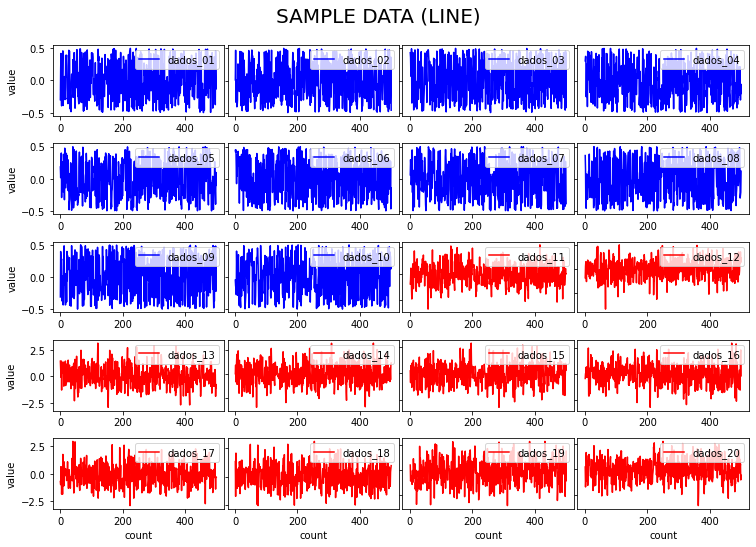

In [6]:
# Line graphs
# Plot setup
fig, ax = plt.subplots(5, 4)
fig.suptitle("SAMPLE DATA (LINE)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 5):
  for j in range(0, 4):
    if i == 4:
      ax[i,j].set_xlabel('count')
    ax[i,j].set_ylabel('value') 

# Fill graphs with data
k = 0
c = 'blue'
for i in range(0, 5):
  for j in range(0, 4):
    df[files[k]].plot(ax=ax[i,j],
                      subplots=True,
                      kind='line',
                      color = c,
                      legend=True,
                      sharex=False,
                      sharey=True,
                      grid=False)
    k = k+1
    if k==10:
      c = 'red'

# force legend position
[ax.legend(loc=1) for ax in plt.gcf().axes]

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=0.0, h_pad=1.0)

# Save graphs to pdf file
fig.savefig('p01.pdf')

##### Análise
Através dos gráficos de linha, é possível verificar uma diferença na amplitude dos valores dos dados, de tal forma que podemos separá-los em dois grupos (em relação à amplitude): o primeiro, composto pelos arquivos "dados_01" até "dados_10", com amplitudes variando entre -0.5 a 0.5, e o segundo, composto pelos arquivos "dados_11" a "dados_20", cujas amplitudes variam de -2.5 a 2.5.

#### Histograma



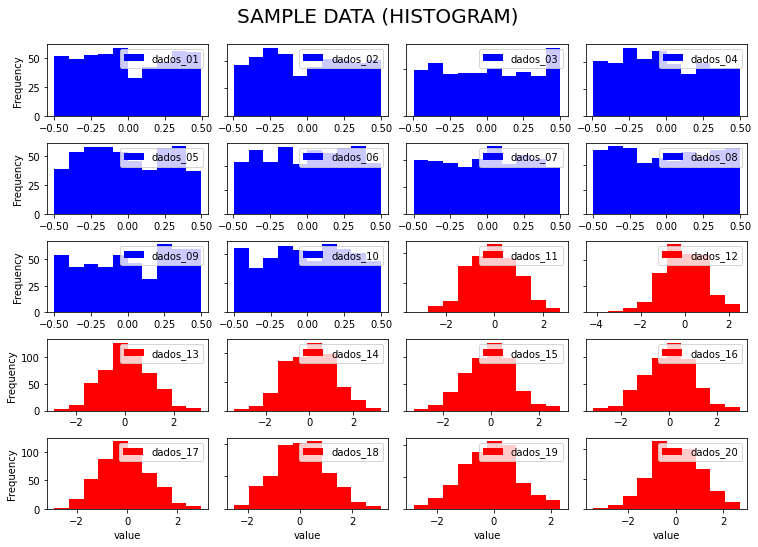

In [7]:
# Histogram graphs
# Plot setup
fig, ax = plt.subplots(5, 4)
fig.suptitle("SAMPLE DATA (HISTOGRAM)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(4, 5):
  for j in range(0, 4):
    ax[i,j].set_xlabel('value')
    ax[i,j].set_ylabel('count') 

# Fill graphs with data
k = 0
c = 'blue'
for i in range(0, 5):
  for j in range(0, 4):
    df[files[k]].plot(ax=ax[i,j],
                      subplots=True,
                      kind='hist',
                      color = c,
                      legend=True,
                      sharex=False,
                      sharey=True,
                      grid=False)
    k = k+1
    if k==10:
      c = 'red'

# force legend position
[ax.legend(loc=1) for ax in plt.gcf().axes]

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=1.0, h_pad=1.0)

# Save graphs to pdf file
fig.savefig('p02.pdf')

##### Análise
Através dos histogramas, é possível verificar, além da diferença de amplitude, também verificada no gráfico de linha, uma clara diferença na distribuição, de tal forma que possamos separar os arquivos em dois grupos (em relação à distribuição dos valores): o primeiro, composto pelos arquivos "dados_01" até "dados_10", com distribuição uniforme, e o segundo, composto pelos arquivos "dados_11" a "dados_20", com distribuição normal.

#### Mapa de cores



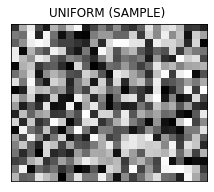

In [8]:
# Plot 200x200 pixel colomap for one uniform distributed sample (required)
px = 1/plt.rcParams['figure.dpi']
data = df['dados_01'].to_numpy().reshape(20, 25)
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle("UNIFORM (SAMPLE)")
ax.imshow(data, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])
plt.imshow(data, cmap='gray', aspect='equal')
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

# Save 200x200 plot to pdf file
fig.savefig('p03.pdf')

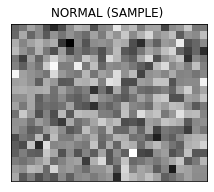

In [9]:
# Plot 200x200 pixel colomap for one normal distributed sample (required)
px = 1/plt.rcParams['figure.dpi']
data = df['dados_11'].to_numpy().reshape(20, 25)
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle("NORMAL (SAMPLE)")
ax.imshow(data, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])
plt.imshow(data, cmap='gray', aspect='equal')
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=10.0)

# Save 200x200 plot to pdf file
fig.savefig('p04.pdf')

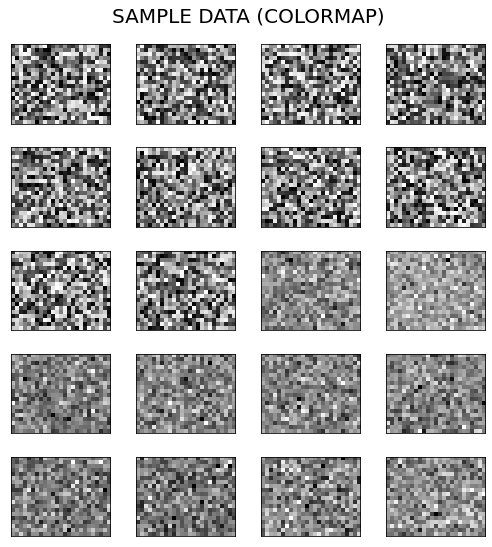

In [10]:
# Colormap graphs
fig, ax = plt.subplots(5, 4)
fig.suptitle("SAMPLE DATA (COLORMAP)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 5):
  for j in range(0, 4):
    ax[i,j].set_xticks([],[])
    ax[i,j].set_yticks([],[])

# Fill graphs with data
k = 0
c = 'blue'
for i in range(0, 5):
  for j in range(0, 4):    
    data = df[files[k]].to_numpy().reshape(20, 25)
    ax[i, j].imshow(data, cmap='gray')    
    k = k+1

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=-20.0, h_pad=2.0)

# Save graphs to pdf file
fig.savefig('p05.pdf')

##### Análise
Através dos mapas de cores em escala de cinza, é possível verificar, claramente uma diferença na distribuição dos valores, através das tonalidades de cinza. Assim como nas outras análises (linha e histograma), podemos separar os arquivos em dois grupos: o primeiro, composto pelos arquivos "dados_01" até "dados_10", com distribuição uniforme, e o segundo, composto pelos arquivos "dados_11" a "dados_20", com distribuição normal.

### Dados Gerados
Para gerar os padrões semelhantes aos padrões dos dados fornecidos, criaremos um dataframe com 500 linhas com 20 colunas, onde as 10 primeiras colunas contém valores aleatórios, distribuidos uniformemente entre -0.5 e 0.5, e as 10 últimas, com valores aleatórios distribuídos normalmente com mu = 0 e sigma = 1.


In [11]:
# Generate dataframe with 10 uniform distributions
colu=['dados_01', 'dados_02', 'dados_03', 'dados_04', 'dados_05',
      'dados_06', 'dados_07', 'dados_08', 'dados_09', 'dados_10']

dfu = pd.DataFrame(np.random.uniform(low=-0.5, high=0.5, size=(500,10)))
dfu.columns = colu

In [12]:
# Generate dataframe with 10 normal distributions
coln=['dados_11', 'dados_12', 'dados_13', 'dados_14', 'dados_15',
      'dados_16', 'dados_17', 'dados_18', 'dados_19', 'dados_20']

mu, sigma = 0, 1
dfn = pd.DataFrame(np.random.normal(mu, sigma, (400, 10)))
dfn.columns = coln

In [13]:
# Concatenate uniform and normal dataframes
dfg = pd.concat([dfu, dfn], axis=1)

#### Gráfico de Linha



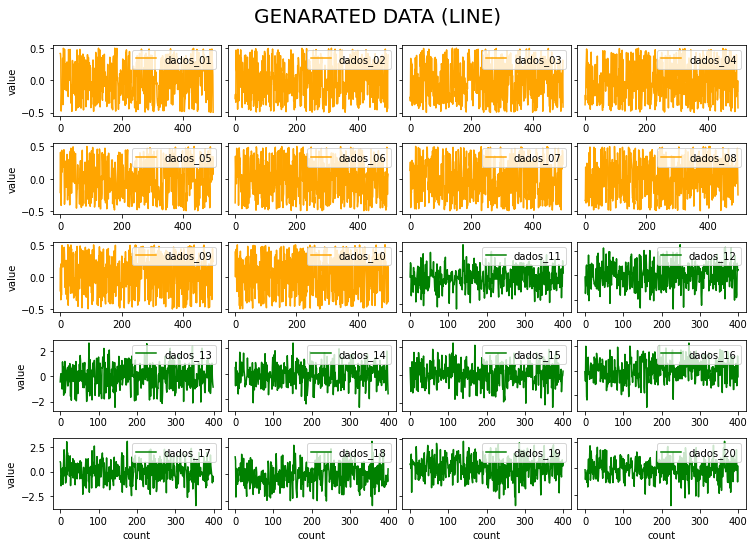

In [14]:
# Line graphs
# Plot setup
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(11.69, 8.27)
fig.suptitle("GENARATED DATA (LINE)", fontsize=20)
for i in range(0, 5):
  for j in range(0, 4):
    if i == 4:
      ax[i,j].set_xlabel('count')
    ax[i,j].set_ylabel('value') 

# Fill graphs with data
k = 0
c = 'orange'
for i in range(0, 5):
  for j in range(0, 4):
    dfg[files[k]].plot(ax=ax[i,j],
                      subplots=True,
                      kind='line',
                      color = c,
                      legend=True,
                      sharex=False,
                      sharey=True,
                      grid=False)
    k = k+1
    if k==10:
      c = 'green'

# force legend position
[ax.legend(loc=1) for ax in plt.gcf().axes]

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=0.0, h_pad=1.0)

# Save graphs to pdf file
fig.savefig('p06.pdf')

##### Análise
Através dos gráficos de linha, é possível verificar uma diferença na amplitude dos valores dos dados gerados, com um perfil bem semelhante ao dos dados fornecidos.

#### Histograma

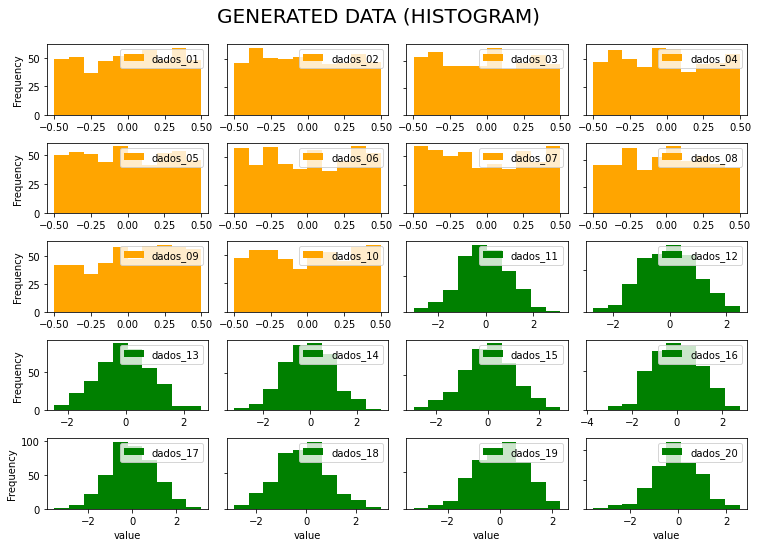

In [15]:
# Histogram graphs
# Plot setup
fig, ax = plt.subplots(5, 4)
fig.suptitle("GENERATED DATA (HISTOGRAM)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(4, 5):
  for j in range(0, 4):
    ax[i,j].set_xlabel('value')
    ax[i,j].set_ylabel('count')

# Fill graphs with data
k = 0
c = 'orange'
for i in range(0, 5):
  for j in range(0, 4):    
    dfg[files[k]].plot(ax=ax[i,j],
                      subplots=True,
                      kind='hist',
                      color = c,
                      legend=True,
                      sharex=False,
                      sharey=True,
                      grid=False)
    k = k+1
    if k==10:
      c = 'green'

# force legend position
[ax.legend(loc=1) for ax in plt.gcf().axes]

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=1.0, h_pad=1.0)

# Save graphs to pdf file
fig.savefig('p07.pdf')

##### Análise
Através dos histogramas gerados, é possível verificar, para todos os dados gerados, tanto para a distribuição uniforme, quanto para a distribuição normal, um perfil bem semelhante ao dos dados fornecidos.

#### Mapa de cores



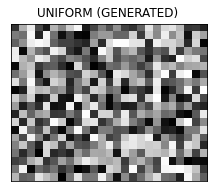

In [16]:
# Plot 200x200 pixel colomap for one uniform distributed generated (required)
px = 1/plt.rcParams['figure.dpi']
data = df['dados_01'].to_numpy().reshape(20, 25)
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle("UNIFORM (GENERATED)")
ax.imshow(data, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])
plt.imshow(data, cmap='gray', aspect='equal')
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

# Save 200x200 plot to pdf file
fig.savefig('p08.pdf')

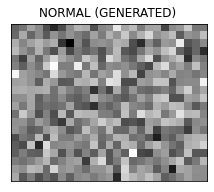

In [17]:
# Plot 200x200 pixel colomap for one normal distributed generated (required)
px = 1/plt.rcParams['figure.dpi']
data = df['dados_11'].to_numpy().reshape(20, 25)
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle("NORMAL (GENERATED)")
ax.imshow(data, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])
plt.imshow(data, cmap='gray', aspect='equal')
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=10.0)

# Save 200x200 plot to pdf file
fig.savefig('p09.pdf')

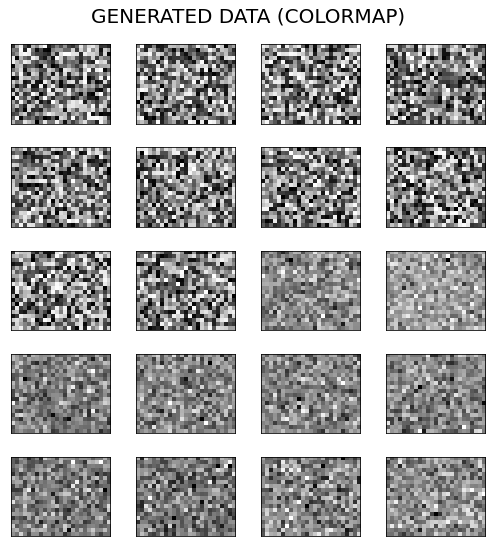

In [18]:
# Colormap graphs
fig, ax = plt.subplots(5, 4)
fig.suptitle("GENERATED DATA (COLORMAP)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 5):
  for j in range(0, 4):
    ax[i,j].set_xticks([],[])
    ax[i,j].set_yticks([],[])

# Fill graphs with data
k = 0
c = 'blue'
for i in range(0, 5):
  for j in range(0, 4):    
    data = df[files[k]].to_numpy().reshape(20, 25)
    ax[i, j].imshow(data, cmap='gray')    
    k = k+1

# Plot graphs
plt.tight_layout(pad=5.0, w_pad=-20.0, h_pad=2.0)

# Save graphs to pdf file
fig.savefig('p10.pdf')

##### Análise
Através dos mapas de cores para os dados gerados, é possível verificar, para todos os dados gerados, tanto para a distribuição uniforme, quanto para a distribuição normal, um perfil bem semelhante ao dos mapas de cores para dos dados fornecidos.

## Parte B
Implementar programas para implementação dos autômatos da Figura 6, obtendo
visualizações semelhantes às da Figura 7. Combinar os autômatos da Figura 6 de forma a obter resultados semelhantes aos da Figura 10. Obter padrões geométricos como os das Figuras 11 e 12. Obter as distribuições de números de 1’s gerados pelos autômatos da Figura 6, de forma compatível com os resultados da Figura 13.

### Figura 7
Implementar programas para implementação dos autômatos na Figura 6, obtendo
visualizações semelhantes às da Figura 7.


#### Programa
A seguir está a implementação do autômato da figura 5. A rotina foi construída de forma que é possível aproveitá-la na construção dos autômatos da figura 6(a), 6(b) e 6(c).

In [19]:
# Figures 6 automaton (a, b and c)
def automaton6(length, startp, mtrans, ntrans):
  position = startp
  sequence = [startp]
  i = 0

  while i < length:
    i=i+1
    if position == '0':
      change = np.random.choice(ntrans[0], replace=True, p = mtrans[0])
      if change == '00':
        position = '0'
        sequence.append('0')

      if change == '01':
        position = '1'
        sequence.append('1')
      continue

    if position == '1':
      change = np.random.choice(ntrans[1], replace=True, p = mtrans[1])
      if change == '11':
        position = '1'
        sequence.append('1')

      if change == '10':
        position = '0'
        sequence.append('0')
      continue
    
  return sequence

In [20]:
# Automaton 6 test
automaton6(10, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])

['0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0']

#### Visualizações

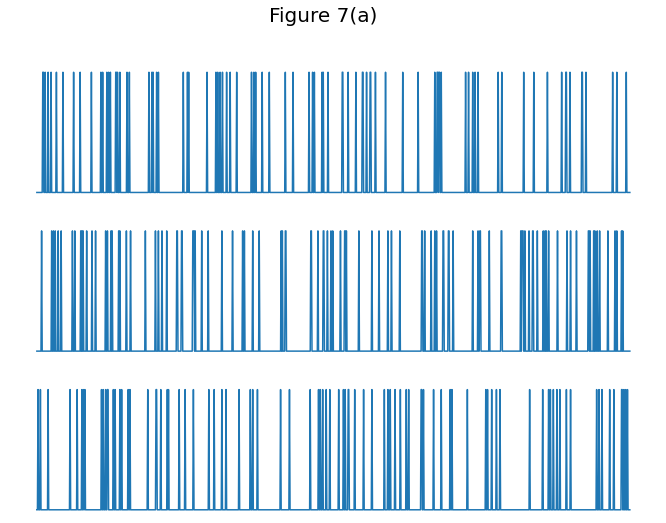

In [21]:
# Figure 7 (a)
fig, ax = plt.subplots(3, 1)
fig.suptitle("Figure 7(a)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 3): 
  A = automaton6(1000, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])
  ax[i].plot(A)
  ax[i].axis('off')
ax[i].axes.get_yaxis().set_visible(True)

# Plot to screen
plt.show()

# Plot to file
fig.savefig('p11.pdf')

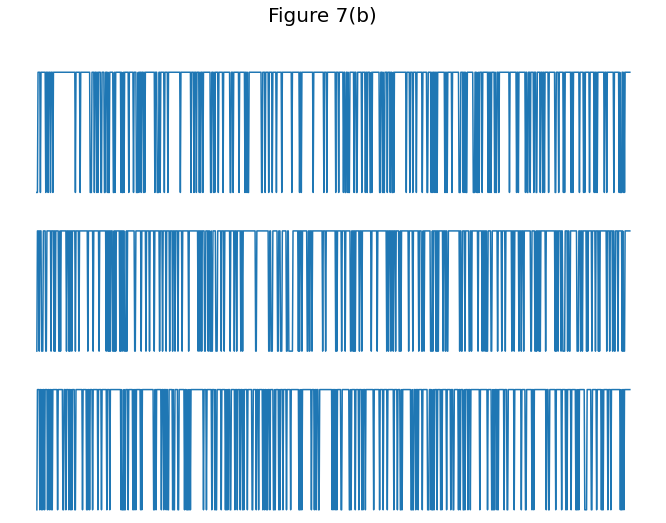

In [22]:
# Figure 7 (b)
fig, ax = plt.subplots(3, 1)
fig.suptitle("Figure 7(b)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 3):
  A = automaton6(1000, '0', [[0.2, 0.8], [0.2, 0.8]], [['00', '01'],['10', '11']])
  ax[i].plot(A)
  ax[i].axis('off')

# Plot to screen
plt.show()

# Plot to file
fig.savefig('p12.pdf')


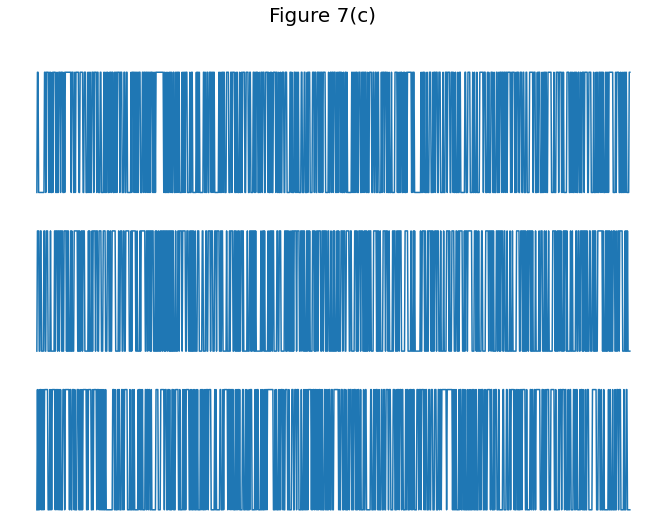

In [23]:
# Figure 7 (c)
fig, ax = plt.subplots(3, 1)
fig.suptitle("Figure 7(c)", fontsize=20)
fig.set_size_inches(11.69, 8.27)
for i in range(0, 3):
  A = automaton6(1000, '0', [[0.5, 0.5], [0.5, 0.5]], [['00', '01'],['10', '11']])
  ax[i].plot(A)
  ax[i].axis('off')

# Plot to screen
plt.show()

# Plot to file
fig.savefig('p13.pdf')

### Figura 10
Combinar os autômatos da Figura 6 de forma a obter resultados semelhantes aos da Figura 10.

#### Programas
A seguir está a implementação do autômatos da figuras 6(d) e 6(e).

In [24]:
# Figure 6(d) automaton
def automaton6d(length, startp, mtrans, ntrans):
  position = startp
  sequence = [startp]
  i = 0

  while i < length:
    i=i+1
####
    if position == '0':
      change = np.random.choice(ntrans[0], replace=True, p = mtrans[0])
      if change == '00':
        position = '0'
        sequence.append('0')
      
      elif change == '01':
        position = '1'
        sequence.append('1')
      continue
####
    elif position == '1':
      change = np.random.choice(ntrans[1], replace=True, p = mtrans[1])
      if change == '10':
        position = '0'
        sequence.append('0')
      
      elif change == '11':
        position = '1'
        sequence.append('1')
      
      elif change == '12':
        position = '2'
        sequence.append('2')
      continue
####
    elif position == '2':
      change = np.random.choice(ntrans[2], replace=True, p = mtrans[2])
      if change == '22':
        position = '2'
        sequence.append('2')
      
      elif change == '23':
        position = '3'
        sequence.append('3')
      continue
####
    elif position == '3':
      change = np.random.choice(ntrans[3], replace=True, p = mtrans[3])
      if change == '32':
        position = '2'
        sequence.append('2')
        
      elif change == '33':
        position = '3'
        sequence.append('3')
      
      elif change == '34':
        position = '4'
        sequence.append('4')
      continue
####
    elif position == '4':
      change = np.random.choice(ntrans[4], replace=True, p = mtrans[4])
      if change == '44':
        position = '4'
        sequence.append('4')
        
      elif change == '45':
        position = '5'
        sequence.append('5')
      continue
####
    elif position == '5':
      change = np.random.choice(ntrans[5], replace=True, p = mtrans[5])
      if change == '50':
        position = '0'
        sequence.append('0')
        
      elif change == '54':
        position = '4'
        sequence.append('4')
      
      elif change == '55':
        position = '5'
        sequence.append('5')
      continue

  return sequence

In [25]:
# Figure 6(e) automaton
def automaton6e(length, startp, mtrans, ntrans):
  position = startp
  sequence = [startp]
  i = 0

  while i < length:
    i=i+1
####
    if position == '0':
      change = np.random.choice(ntrans[0], replace=True, p = mtrans[0])
      if change == '00':
        position = '0'
        sequence.append('0')
      
      elif change == '01':
        position = '1'
        sequence.append('1')
      continue
####
    elif position == '1':
      change = np.random.choice(ntrans[1], replace=True, p = mtrans[1])
      if change == '10':
        position = '0'
        sequence.append('0')
      
      elif change == '11':
        position = '1'
        sequence.append('1')
      
      elif change == '12':
        position = '2'
        sequence.append('0')
      continue
####
    elif position == '2':
      change = np.random.choice(ntrans[2], replace=True, p = mtrans[2])
      if change == '22':
        position = '2'
        sequence.append('0')
      
      elif change == '23':
        position = '3'
        sequence.append('1')
      continue
####
    elif position == '3':
      change = np.random.choice(ntrans[3], replace=True, p = mtrans[3])
      if change == '32':
        position = '2'
        sequence.append('0')
        
      elif change == '33':
        position = '3'
        sequence.append('1')
      
      elif change == '34':
        position = '4'
        sequence.append('0')
      continue
####
    elif position == '4':
      change = np.random.choice(ntrans[4], replace=True, p = mtrans[4])
      if change == '44':
        position = '4'
        sequence.append('0')
        
      elif change == '45':
        position = '5'
        sequence.append('1')
      continue
####
    elif position == '5':
      change = np.random.choice(ntrans[5], replace=True, p = mtrans[5])
      if change == '50':
        position = '0'
        sequence.append('0')
        
      elif change == '54':
        position = '4'
        sequence.append('0')
      
      elif change == '55':
        position = '5'
        sequence.append('1')
      continue

  return sequence

In [26]:
mtrans = [[0.900, 0.100, 0.000, 0.000, 0.000, 0.000],
          [0.882, 0.098, 0.020, 0.000, 0.000, 0.000],
          [0.000, 0.000, 0.200, 0.800, 0.000, 0.000],
          [0.000, 0.000, 0.194, 0.776, 0.030, 0.000],
          [0.000, 0.000, 0.000, 0.000, 0.500, 0.500],
          [0.010, 0.000, 0.000, 0.000, 0.495, 0.495]]

ntrans =  [['00', '01', '02', '03', '04', '05'],
           ['10', '11', '12', '13', '14', '15'],
           ['20', '21', '22', '23', '24', '25'],
           ['30', '31', '32', '33', '34', '35'],
           ['40', '41', '42', '43', '44', '45'],
           ['50', '51', '52', '53', '54', '55']]

#### Visualizações

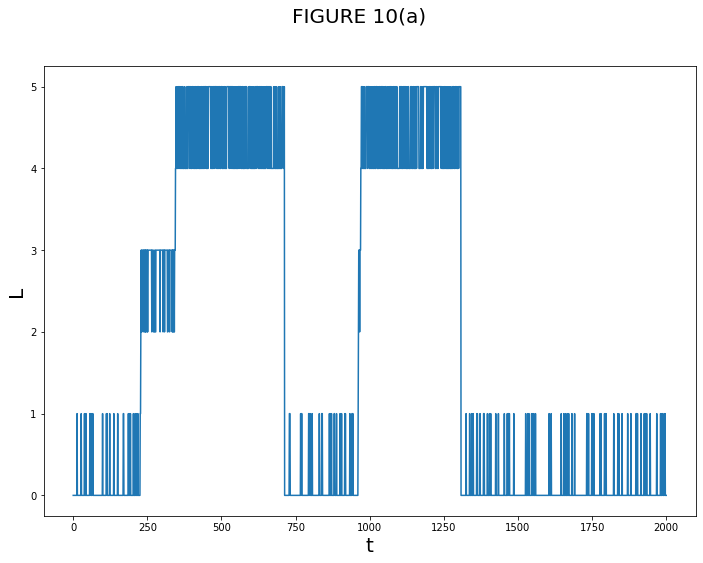

In [27]:
# Gerenerate sequence
A = automaton6d(2000, '0', mtrans, ntrans)


# Plot figure 10(a)
fig, ax = plt.subplots()
fig.suptitle("FIGURE 10(a)", fontsize=20)
fig.set_size_inches(11.69, 8.27)

ax.plot(A)
ax.set_xlabel('t', fontsize=20)
ax.set_ylabel('L', fontsize=20)

# Plot to screen
plt.show()

# Plot to file
fig.savefig('p14.pdf')

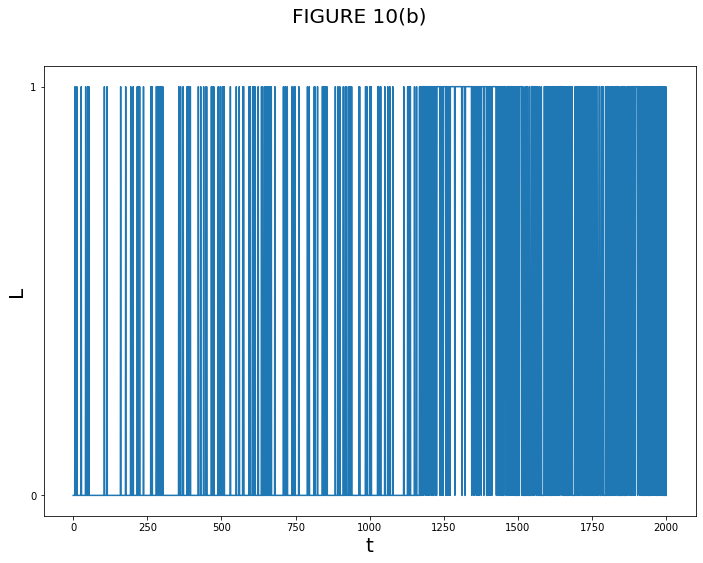

In [28]:
# Gerenerate sequence
B = automaton6e(2000, '0', mtrans, ntrans)


# Plot figure 10(b)
fig, ax = plt.subplots()
fig.suptitle("FIGURE 10(b)", fontsize=20)
fig.set_size_inches(11.69, 8.27)

ax.plot(B)
ax.set_xlabel('t', fontsize=20)
ax.set_ylabel('L', fontsize=20)

# Plot to screen
plt.show()

# Plot to file
fig.savefig('p15.pdf')

### Figura 11
Obter padrões geométricos da figura 11 usando o autômato da figura 5.

#### Programas

In [29]:
# Figures 5 automaton
def automaton5(length, startp, mtrans, ntrans):
  position = startp
  sequence = [startp]
  i = 0

  while i < length:
    i=i+1
    if position == '0':
      change = np.random.choice(ntrans[0], replace=True, p = mtrans[0])
      if change == '00':
        position = '0'
        sequence.append('0')

      if change == '01':
        position = '1'
        sequence.append('1')
      continue

    if position == '1':
      change = np.random.choice(ntrans[1], replace=True, p = mtrans[1])
      if change == '11':
        position = '1'
        sequence.append('1')

      if change == '10':
        position = '0'
        sequence.append('0')
      continue
    
  return sequence

#### Visualizações

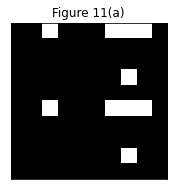

In [30]:
# Plot figure 11(a)

# Create two distinct one-dimensional pattern using automaton56 (fig5)
X = automaton5(49, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])
Y = X
A = X + Y
A = np.array(list(map(int, A)))
A = A.reshape(10, 10)

# Plot 200x200 pixel colomap (could not find a better alternative)
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle('Figure 11(a)')
ax.imshow(A, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])

# Plot to screen
plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=10.0)

# Plot to file
fig.savefig('p16.pdf')

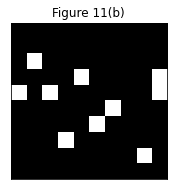

In [31]:
# Plot figure 11(b)

# Create two distinct one-dimensional pattern using automaton56 (fig5)
X = automaton5(49, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])
Y = automaton5(49, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])
A = X + Y
A = np.array(list(map(int, A)))
A = A.reshape(10, 10)

# Plot 200x200 pixel colomap (could not find a better alternative)
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle('Figure 11(b)')
ax.imshow(A, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])

# Plot to screen
plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=10.0)

# Plot to file
fig.savefig('p17.pdf')

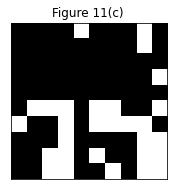

In [32]:
# Plot figure 11(c)

# Create two distinct one-dimensional patterns using automaton56 (fig5 and fig 6 (c))
X = automaton5(49, '0', [[0.9, 0.1], [0.9, 0.1]], [['00', '01'],['10', '11']])
Y = automaton5(49, '0', [[0.5, 0.5], [0.5, 0.5]], [['00', '01'],['10', '11']])
A = X + Y
A = np.array(list(map(int, A)))
A = A.reshape(10, 10)

# Plot 200x200 pixel colomap (could not find a better alternative)
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(figsize=(200*px, 200*px))
fig.suptitle('Figure 11(c)')
ax.imshow(A, cmap='gray')
ax.set_aspect('equal')
ax.set_xticks([],[])
ax.set_yticks([],[])

# Plot to screen
plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=10.0)

# Plot to file
fig.savefig('p18.pdf')

### Figura 12
Obter padrões geométricos da figura 12 usando o autômato da figura 5.

#### Programas

In [33]:
# This routine uses automaton 5 already implemented.

#### Visualizações

In [34]:
# Not implemented

### Figura 13
Obter as distribuições de números de 1’s gerados pelos autômatos da Figura 6, de forma compatível com os resultados da Figura 13.

#### Programas

In [35]:
# This routine uses automaton 6 already implemented.

#### Visualizações

In [36]:
# Not implemented

# Files generation

In [37]:
# Generate results file
from PyPDF2 import PdfFileMerger

pdfs = ['p01.pdf', 'p02.pdf', 'p03.pdf', 'p04.pdf', 'p05.pdf', 'p06.pdf',
        'p07.pdf', 'p08.pdf', 'p09.pdf', 'p10.pdf', 'p11.pdf', 'p12.pdf',
        'p13.pdf', 'p14.pdf', 'p15.pdf', 'p16.pdf', 'p17.pdf', 'p18.pdf']
merger = PdfFileMerger()
for pdf in pdfs:
    merger.append(pdf)

merger.write("results.pdf")
merger.close()

In [38]:
# Generate code file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('7600064/project1/project1.ipynb')

Mounted at /content/drive
--2021-06-11 22:44:04--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-06-11 22:44:04 (35.7 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/7600064/project1/project1.ipynb to pdf
[NbConvertApp] Support files will be in project1_files/
[NbConvertApp] Making directory ./project1_files
[NbConvertApp] Making directory ./project1_files
[NbConvertApp] Making directory ./project1_files
[NbConvertApp] Making directory ./proj

'File Download Unsuccessful. Saved in Google Drive'